# NewsMood

* CNN has a mix of both positive and negative tweets, resulting in a compound score very close to zero (neutral).
* CBS is the most positive news outlet of the five and rarely tweets negative content.
* FOX and the New York Times have a very similar mix of positive and negative tweets, with their compound scores being nearly identical.

In [64]:
import tweepy
import json
import pandas as pd
import numpy as np
from config import (consumer_key, consumer_secret, access_token, access_token_secret)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from datetime import datetime
import matplotlib.pyplot as plt

analyzer = SentimentIntensityAnalyzer()
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [111]:
master_list = []
news_orgs = ["BBC", "CBS", "CNN", "FOXTV", "nytimes"]

for user in news_orgs:
    
    #Loop through 5 pages of tweets (total 100 tweets)
    for x in range(1, 6):

        #Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        #Loop through all tweets
        for tweet in public_tweets:

            #Vader analysis
            results = analyzer.polarity_scores(tweet["text"])
            
            #Timestamp conversion
            time = tweet["created_at"]
            converted_time = datetime.strptime(time, "%a %b %d %H:%M:%S %z %Y").replace(tzinfo=None)
            
            #Add all data to dictionary
            master_list.append({
                "User": user,
                "Time": converted_time,
                "Tweet Text": tweet["text"],
                "Compound": results["compound"],
                "Positive": results["pos"],
                "Neutral": results["neu"],
                "Negative": results["neg"],
            })

In [113]:
#Convert list of dictionaries to dataframe
data_frame = pd.DataFrame(master_list)

#Export to CSV
data_frame.to_excel("sentiment_news_tweets.xlsx", index=False)

In [75]:
#Creating user-specific dataframes
bbc = data_frame[data_frame["User"] == "BBC"]
cbs = data_frame[data_frame["User"] == "CBS"]
cnn = data_frame[data_frame["User"] == "CNN"]
fox = data_frame[data_frame["User"] == "FOXTV"]
nyt = data_frame[data_frame["User"] == "nytimes"]

In [1]:
plt.figure()

#Different handles for each news outlet
bbc_handle = plt.scatter(bbc.index, bbc["Compound"], marker="o", c="yellow", edgecolors="black", alpha = .70, label = "BBC")
cbs_handle = plt.scatter(bbc.index, cbs["Compound"], marker="o", c="darkorchid", edgecolors="black", alpha = .70, label = "CBS")
cnn_handle = plt.scatter(bbc.index, cnn["Compound"], marker="o", c="lawngreen", edgecolors="black", alpha = .70, label = "CNN")
fox_handle = plt.scatter(bbc.index, fox["Compound"], marker="o", c="orangered", edgecolors="black", alpha = .70, label = "FOX")
nyt_handle = plt.scatter(bbc.index, nyt["Compound"], marker="o", c="dodgerblue", edgecolors="black", alpha = .70, label = "NYT")

plt.title("Sentiment Analysis of Media Tweets (6/13/2018)")
plt.xlabel("Number of Tweets Ago")
plt.ylabel("Sentiment")

lgnd = plt.legend(loc="upper left", fancybox=True, shadow=True, bbox_to_anchor=(1, 0.5), title="News Outlets")
lgnd.legendHandles[0]
lgnd.legendHandles[1]
lgnd.legendHandles[2]
lgnd.legendHandles[3]
lgnd.legendHandles[4]

#Export to PNG
plt.savefig("sentiment_scatter.png",dpi="figure",bbox_inches="tight")

plt.show()

NameError: name 'plt' is not defined

In [77]:
group = data_frame.groupby(["User"])
thing = group.mean()
thing

,Compound,Negative,Neutral,Positive
User,,,,
BBC,0.125926,0.05397,0.84130,0.10473
CBS,0.371163,0.00813,0.80018,0.19169
CNN,0.009810,0.06280,0.86752,0.06969
FOXTV,0.157047,0.02280,0.85366,0.12354
nytimes,0.161059,0.04120,0.84178,0.11702


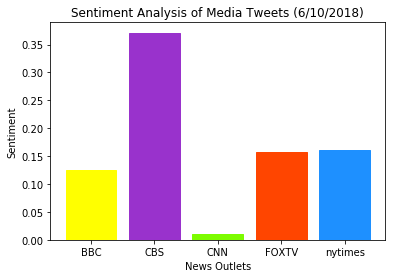

In [91]:
barlist = plt.bar(news_orgs, thing["Compound"])

#Assigning corresponding colors to each bar
barlist[0].set_color('yellow')
barlist[1].set_color('darkorchid')
barlist[2].set_color('lawngreen')
barlist[3].set_color('orangered')
barlist[4].set_color('dodgerblue')

plt.title("Sentiment Analysis of Media Tweets (6/13/2018)")
plt.xlabel("News Outlets")
plt.ylabel("Sentiment")

#Export to PNG
plt.savefig("sentiment_bar.png")

plt.show()